In [329]:
# Environment Setup
import os
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
print("="*72)

%reload_ext watermark
%watermark -a "Nabil" -u -d -m

print("="*72)
print("Imported Packages and Their Versions:")
print("="*72)

%watermark -iv
print("="*72)

Author: Nabil

Last updated: 2024-12-16

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 12, GenuineIntel
CPU cores   : 8
Architecture: 64bit

Imported Packages and Their Versions:
pandas    : 2.2.3
sys       : 3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]
sklearn   : 1.5.2
keras     : 3.6.0
matplotlib: 3.9.2
seaborn   : 0.13.2
numpy     : 2.0.2
tensorflow: 2.18.0



In [330]:
# load the data
data=pd.read_csv("https://raw.githubusercontent.com/DrSaadLa/PythonTuts/refs/heads/main/Data/credit.csv")

In [331]:
# Check the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [332]:
# Check the data description
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
card,1319,2,yes,1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reports,1319.0,NaN,NaN,NaN,0.456406,1.345267,0.0,0.0,0.0,0.0,14.0
age,1319.0,NaN,NaN,NaN,33.213103,10.142783,0.166667,25.41667,31.25,39.41667,83.5
income,1319.0,NaN,NaN,NaN,3.365376,1.693902,0.21,2.24375,2.9,4.0,13.5
share,1319.0,NaN,NaN,NaN,0.068732,0.094656,0.000109,0.002316,0.038827,0.093617,0.90632
expenditure,1319.0,NaN,NaN,NaN,185.057071,272.218917,0.0,4.583333,101.2983,249.0358,3099.505
owner,1319,2,no,738,NaN,NaN,NaN,NaN,NaN,NaN,NaN
selfemp,1319,2,no,1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,1319.0,NaN,NaN,NaN,0.993935,1.247745,0.0,0.0,1.0,2.0,6.0
months,1319.0,NaN,NaN,NaN,55.267627,66.271746,0.0,12.0,30.0,72.0,540.0


In [333]:
print(data.columns)

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')


In [334]:
# Checking the missing data
num_miss_vals = data.isnull().sum()
print(num_miss_vals)

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64


In [335]:
vars=['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']
data_1=data[vars].replace(0,np.nan)
print(data_1.isnull().sum())

reports        1060
age               0
income            0
share             0
expenditure     317
dependents      659
months            3
majorcards      241
active          219
dtype: int64


In [336]:
data.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

<Axes: >

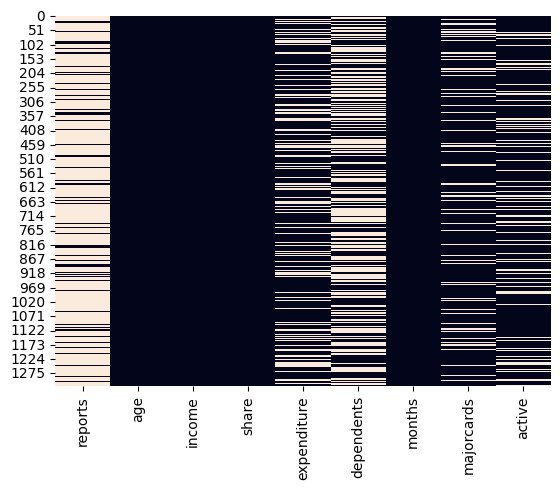

In [337]:
sns.heatmap(data_1.isnull(), cbar = False)

In [338]:
# Missing Data Imputation
data_1=data[vars].replace({'no': 0, 'yes': 1})
data_1=data[vars].fillna(data[vars].mean())

<Axes: >

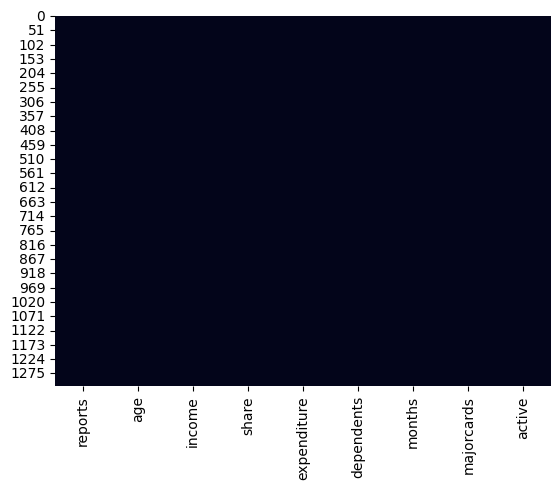

In [339]:
sns.heatmap(data_1.isnull(), cbar = False)

In [340]:
# Check the data shape
print(data.shape)

(1319, 12)


In [341]:
data.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

In [342]:
data["card"].describe()

count     1319
unique       2
top        yes
freq      1023
Name: card, dtype: object

In [343]:
data["card"].unique()

array(['yes', 'no'], dtype=object)

In [344]:
# Separate features (predictors) from the target variable
predictors = data_1.values
predictors = predictors.astype('int64')         # Convert to float64 for numerical stability

# Prepare the target variable
target = data['card'].values
# target=pd.Categorical(target)

# Reshape the target to be 2d array
# target = target.reshape(-1, 1)

# Convert categorical data into int Numerical vlue
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
target=lb.fit_transform(target)
X=predictors
y=target
# Split the data into train-test set
# ----------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.75,
                                                    test_size = 0.25, 
                                                    random_state = 10123)
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)


In [345]:
# Print shapes to verify the data structure
print(f"Features shape: {predictors.shape}")
print(f"Target shape: {target.shape}")
print(f"Sample of target data:\n{[target[5:15]]}")

# Get the number of input features
n_cols = predictors.shape[1]
print(f"Number of input features: {n_cols}")

Features shape: (1319, 9)
Target shape: (1319,)
Sample of target data:
[array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1])]
Number of input features: 9


## Build the Model

In [346]:
# Initialize the sequential model
model = Sequential()

# Add the input layer with shape matching our features
model.add(Input(shape=(n_cols,)))

# Add hidden layer with 64 neurons and ReLU activation
model.add(Dense(64, activation='relu'))

# Add hidden layer with 32 neurons and ReLU activation
model.add(Dense(32, activation='tanh'))

# Add output layer with 2 neurons (binary classification) 
model.add(Dense(1, activation='sigmoid'))

# Display model architecture
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                     │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [347]:
# Configure the model with optimizer, loss function, and metrics
model.compile(
    optimizer=SGD(learning_rate=0.02),                       # Stochastic Gradient Descent optimizer
    loss='binary_crossentropy',            
    metrics=['Accuracy', 'Precision', 'Recall']                   # Track both accuracy,Precision, and Recall during training
)

# Train the model


In [351]:
model.fit(
    X_train,                            # Input features
    y_train,                                # Target variable
    epochs=10,                             # Number of training cycles
    batch_size=15,                         # Number of samples per gradient update
    validation_split=0.2                   # Use 20% of data for validation
)

Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.8992 - Precision: 0.9033 - Recall: 0.9757 - loss: 0.2445 - val_Accuracy: 0.8990 - val_Precision: 0.8922 - val_Recall: 0.9868 - val_loss: 0.2618
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9052 - Precision: 0.9009 - Recall: 0.9869 - loss: 0.2332 - val_Accuracy: 0.9091 - val_Precision: 0.9030 - val_Recall: 0.9868 - val_loss: 0.2541
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9029 - Precision: 0.9016 - Recall: 0.9801 - loss: 0.2497 - val_Accuracy: 0.9040 - val_Precision: 0.8976 - val_Recall: 0.9868 - val_loss: 0.2467
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.9107 - Precision: 0.9152 - Recall: 0.9742 - loss: 0.2300 - val_Accuracy: 0.9242 - val_Precision: 0.9250 - val_Recall: 0.9801 - val_loss: 0.2391
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.9268 - Precision: 0.9323 - Recall: 0.9825 - loss: 0.2009 - val_Accuracy: 0.9192 - val_Precision: 0.9245 

In [365]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [373]:
print(y_pred)

[[9.9922431e-01]
 [2.6564810e-01]
 [9.2684555e-01]
 [4.3258574e-02]
 [3.7485309e-02]
 [5.0939274e-01]
 [9.9800432e-01]
 [9.8878360e-01]
 [9.3416512e-02]
 [9.3854117e-01]
 [9.6330994e-01]
 [3.9224002e-01]
 [1.5432897e-02]
 [9.8590326e-01]
 [5.1544166e-01]
 [6.1364090e-01]
 [8.4440190e-01]
 [9.9800420e-01]
 [9.9995852e-01]
 [9.9625874e-01]
 [9.6610087e-01]
 [9.9633014e-01]
 [9.9925756e-01]
 [5.4518735e-01]
 [9.9316919e-01]
 [9.6410739e-01]
 [9.3157005e-01]
 [9.2600489e-01]
 [9.7754622e-01]
 [9.9840391e-01]
 [4.6377555e-01]
 [9.1900539e-01]
 [9.6988469e-01]
 [3.5641050e-01]
 [9.8782986e-01]
 [9.9987161e-01]
 [6.6001439e-01]
 [8.3708483e-01]
 [9.7355479e-01]
 [9.9887317e-01]
 [3.3897945e-01]
 [9.9909061e-01]
 [8.4578979e-01]
 [9.9939662e-01]
 [9.6848601e-01]
 [1.3262041e-01]
 [9.1561764e-01]
 [9.7716165e-01]
 [9.5425838e-01]
 [9.3968087e-01]
 [4.7053009e-02]
 [6.5125287e-01]
 [7.7858156e-01]
 [9.9949145e-01]
 [9.9789721e-01]
 [5.7701308e-01]
 [9.6673316e-01]
 [9.9420929e-01]
 [9.9933183e-0

In [367]:
# Import Evaluation Metrics
from sklearn.metrics import accuracy_score

In [370]:
accuracy = accuracy_score(y_test, y_pred_class)
print(f'Accuracy: {accuracy:.3f}')

# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred_class))

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_class))

Accuracy: 0.239
Classification Report:
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        79
           1       0.00      0.00      0.00       251

    accuracy                           0.24       330
   macro avg       0.12      0.50      0.19       330
weighted avg       0.06      0.24      0.09       330


Confusion Matrix:
[[ 79   0]
 [251   0]]


C:\Miniconda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Miniconda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Miniconda\envs\mlenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
